In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.25
MACHINE_EPSILON = tol=np.finfo(float).eps

# Problem 1

In order to get a start on the problem, I wanted to simply plot out some terms of the sequence to see what was going on

In [3]:
def sequence(func, x0, num_terms, p):
    seq = [x0]
    for i in range(num_terms):
        if (seq[-1] == p):
            return np.array(seq)
        seq.append(func(seq[-1]))
    return np.array(seq)

## Part A

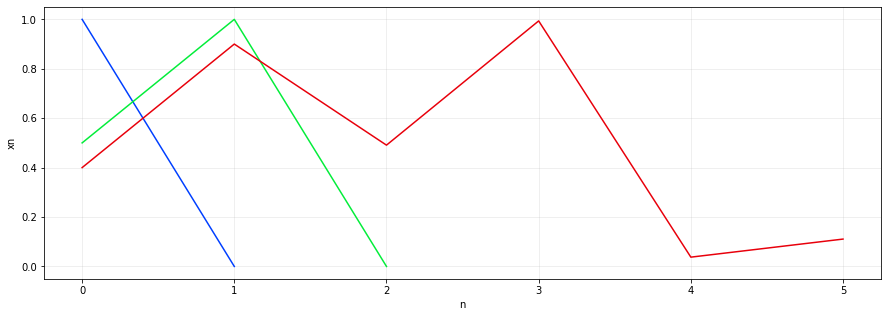

In [4]:
func = lambda x : -16 + 6*x + (12/x)
p = 2

plt.plot(p - sequence(func, 1, 20, p))
plt.plot(p - sequence(func, 1.5, 20, p))
plt.plot(p - sequence(func, 1.6, 5, p))
plt.xlabel('n')
_ = plt.ylabel('xn')

## Part B

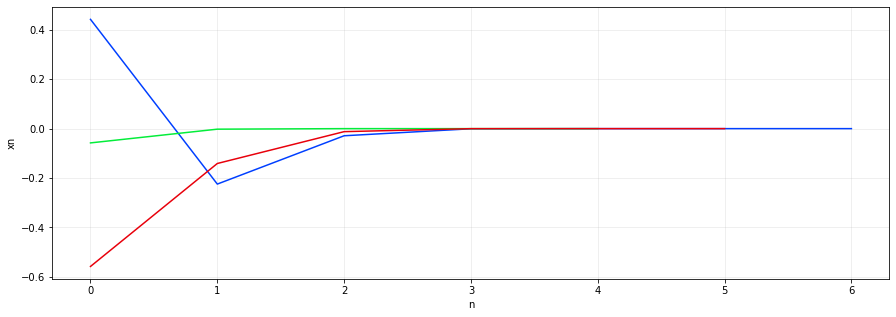

In [5]:
func = lambda x : (2/3)*x + (1/x**2)
p = 3**(1/3)

plt.plot(p - sequence(func, 1, 20, p))
plt.plot(p - sequence(func, 1.5, 20, p))
plt.plot(p - sequence(func, 2, 5, p))
plt.xlabel('n')
_ = plt.ylabel('xn')

## Part C

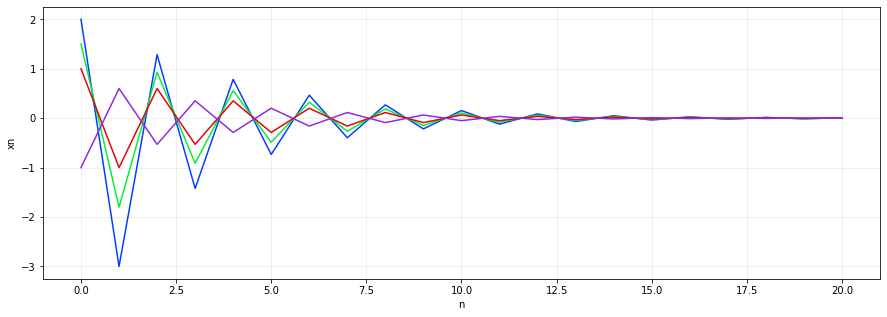

In [6]:
func = lambda x : 12/(1+x)
p = 3

plt.plot(p - sequence(func, 1, 20, p))
plt.plot(p - sequence(func, 1.5, 20, p))
plt.plot(p - sequence(func, 2, 20, p))
plt.plot(p - sequence(func, 4, 20, p))
plt.xlabel('n')
_ = plt.ylabel('xn')

# Problem 2

In [7]:
def newtons_method(func, func_prime, x0, max_iter=100, tol=1e-8):
    history_x = []
    history_fx = []

    x = x0
    fx = func(x)
    history_x.append(x)
    history_fx.append(fx)
    for i in range(max_iter):
        fx_prime = func_prime(x)
        if (fx_prime == 0):
            return x, history_x, history_fx

        x -= (fx / fx_prime)
        fx = func(x)

        history_x.append(x)
        history_fx.append(fx)
        if np.abs(fx) <= tol or np.isinf(fx):
            return x, history_x, history_fx

    return x, history_x, history_fx

## Part A

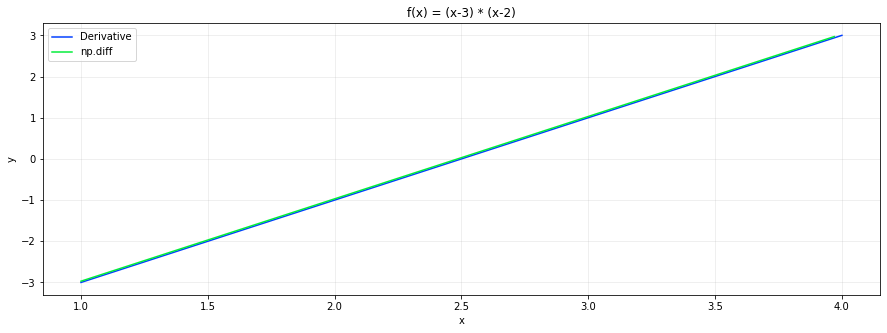

In [8]:
function = lambda x : (x - 3) * (x - 2)
function_prime = lambda x : 2*x - 5
xs = np.linspace(1, 4, 100)
plt.plot(xs, function_prime(xs))
plt.plot(xs[:-1], np.diff(function(xs)) / (xs[1] - xs[0]))
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) = (x-3) * (x-2)')
_ = plt.legend(['Derivative', 'np.diff'])

The two derivative methods seem close enough

## Part B

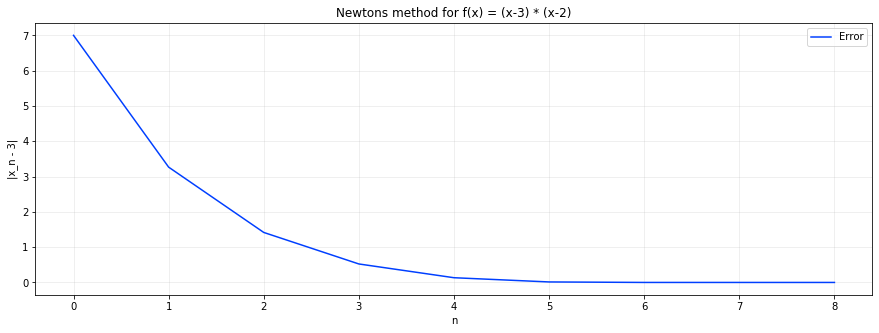

In [9]:
function = lambda x : (x - 3) * (x - 2)
function_prime = lambda x : 2*x - 5
root, x_his, fx_his = newtons_method(function, function_prime, 10)
x_his = np.array(x_his)
plt.plot(np.arange(len(x_his)), np.abs(x_his - 3))
plt.xlabel('n')
plt.ylabel('|x_n - 3|')
plt.title('Newtons method for f(x) = (x-3) * (x-2)')
_ = plt.legend(['Error'])

The error does decay to 0, and it does decay at the rate I would think (quadrtic convergence). This is because the root is simple, so Newton's Method guarantees at least quadtratic convergence.

## Part C

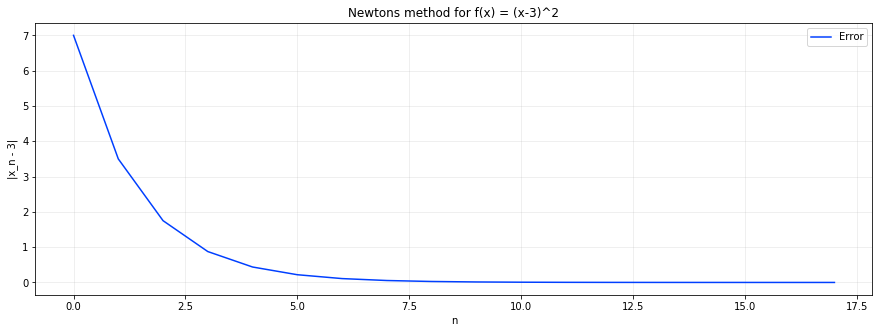

In [10]:
function = lambda x : (x-3)**2
function_prime = lambda x : 2*(x-3)
root, x_his, fx_his = newtons_method(function, function_prime, 10)
x_his = np.array(x_his)
plt.plot(np.arange(len(x_his)), np.abs(x_his - 3))
plt.xlabel('n')
plt.ylabel('|x_n - 3|')
plt.title('Newtons method for f(x) = (x-3)^2')
_= plt.legend(['Error'])

This error decays slightly more slowly than before, which is what I would expect, since the derivative has a smaller magnitude for x > 3, so each step is getting closer to the root, but at a slower rate than before. The convergence is still quadtratic, since it is a well-defined Newton's method. In adition, the root is not simple, so the convergance is slower.

## Part D

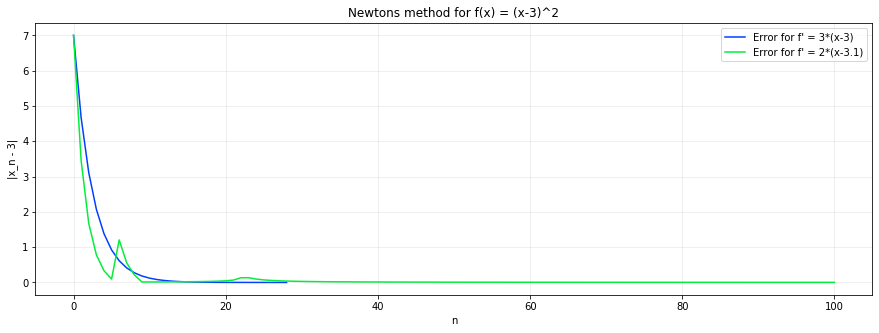

In [11]:
# (i) 3*(x-3)
function_prime = lambda x : 3*(x-3)
root, x_his, fx_his = newtons_method(function, function_prime, 10)
x_his = np.array(x_his)
plt.plot(np.arange(len(x_his)), np.abs(x_his - 3))

# (ii) 2*(x-3.1)
function_prime = lambda x : 2*(x-3.1)
root, x_his, fx_his = newtons_method(function, function_prime, 10)
x_his = np.array(x_his)
plt.plot(np.arange(len(x_his)), np.abs(x_his - 3))

plt.xlabel('n')
plt.ylabel('|x_n - 3|')
plt.title('Newtons method for f(x) = (x-3)^2')
_= plt.legend(['Error for f\' = 3*(x-3)', 'Error for f\' = 2*(x-3.1)'])

The error for both incorrect derivatives eventually converge, but it is interesting to note that the error for 3\*(x-3) smoothly converges, while the 2\*(x-3.1) case has a slight hitch, i.e. it breifly increases after about 5 iterations.

## Part E

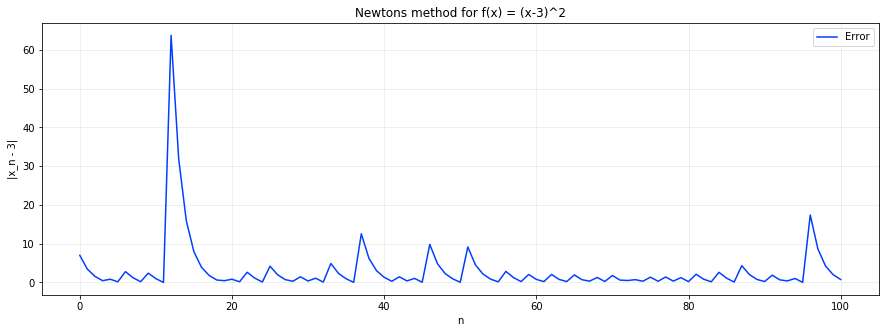

In [12]:
function = lambda x : (x-3)**2 + 1
function_prime = lambda x : 2*(x-3)
root, x_his, fx_his = newtons_method(function, function_prime, 10)
x_his = np.array(x_his)
plt.plot(np.arange(len(x_his)), np.abs(x_his - 3))
plt.xlabel('n')
plt.ylabel('|x_n - 3|')
plt.title('Newtons method for f(x) = (x-3)^2')
_= plt.legend(['Error'])

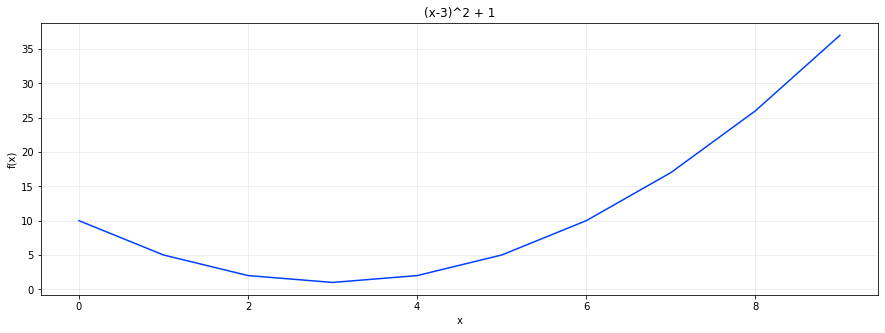

In [13]:
xs = np.arange(0, 10)
plt.plot(xs, function(xs))
plt.xlabel('x')
plt.ylabel('f(x)')
_ = plt.title('(x-3)^2 + 1')

By plotting the function, it is clear that Newton's method is getting to the closest value to a root (3), and then going up the other side, oscillating back and forth near the minimum. AS expected, there is no root, so the error never converges.

# Problem 3

## Part A

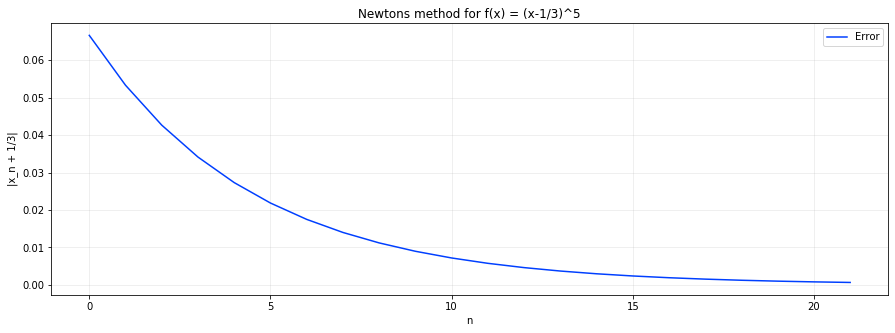

In [14]:
function = lambda x : (x - (1/3))**5
function_prime = lambda x : 5*((x - (1/3))**4)
root, x_his, fx_his = newtons_method(function, function_prime, 0.4, tol=MACHINE_EPSILON)
x_his = np.array(x_his)
plt.plot(np.arange(len(x_his)), np.abs(x_his - (1/3)))
plt.xlabel('n')
plt.ylabel('|x_n + 1/3|')
plt.title('Newtons method for f(x) = (x-1/3)^5')
_= plt.legend(['Error'])

The error decays slowly, as expected, since the root has a multiplicity of $5$

## Part B

By hand, it is clear that $\mu(x) = \frac{(x-1/3)^5}{5(x-1/3)^4}$ which simplifies to $\frac{1}{5}(x-\frac{1}{3})$. Thus $\mu'(x) = \frac{1}{5}$

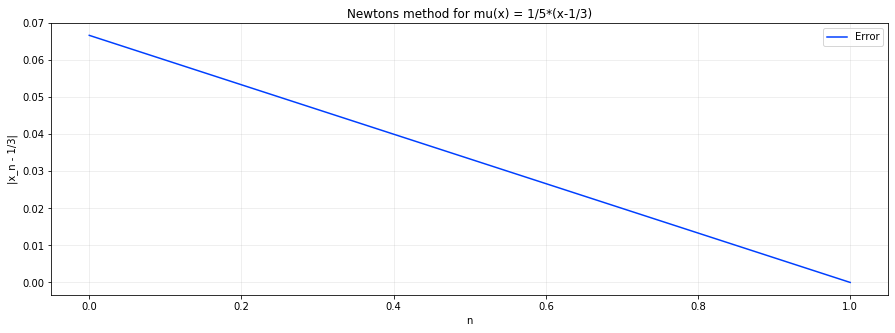

In [15]:
mu = lambda x : (1/5)*(x-1/3)
mu_prime = lambda x : 1/5
root, x_his, fx_his = newtons_method(mu, mu_prime, 0.4, tol=MACHINE_EPSILON)
x_his = np.array(x_his)
plt.plot(np.arange(len(x_his)), np.abs(x_his - (1/3)))
plt.xlabel('n')
plt.ylabel('|x_n - 1/3|')
plt.title('Newtons method for mu(x) = 1/5*(x-1/3)')
_= plt.legend(['Error'])

In [16]:
with np.printoptions(precision=20, suppress=True):
    print(np.abs(x_his - (1/3))[:20])
    print(root)

[0.06666666666666671 0.                 ]
0.3333333333333333


The error converges in one step! This is expected since modified Newton's is meant to speed up the convergence

## Part C

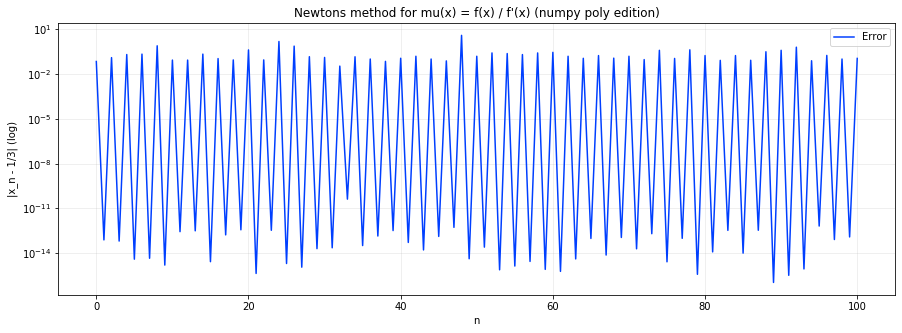

In [17]:
f_coeffs = np.poly(5*[1/3])
f_prime_coeffs = np.polyder(f_coeffs)
f_prime_prime_coeffs = np.polyder(f_prime_coeffs)
f = lambda x : np.polyval(f_coeffs, x)
f_prime = lambda x : np.polyval(f_prime_coeffs, x)
f_prime_prime = lambda x : np.polyval(f_prime_prime_coeffs, x)

mu = lambda x : f(x) / f_prime(x)
mu_prime = lambda x : (f_prime(x)**2 - f(x)*f_prime_prime(x)) / (f_prime(x))**2

root, x_his, fx_his = newtons_method(mu, mu_prime, 0.4, tol=MACHINE_EPSILON)
x_his = np.array(x_his)
plt.plot(np.arange(len(x_his)), np.abs(x_his - (1/3)))
plt.xlabel('n')
plt.yscale('log')
plt.ylabel('|x_n - 1/3| (log)')
plt.title('Newtons method for mu(x) = f(x) / f\'(x) (numpy poly edition)')
_= plt.legend(['Error'])

In [18]:
with np.printoptions(precision=20, suppress=True):
    print(np.abs(x_his - (1/3))[:20])

[0.06666666666666671    0.00000000000007799317 0.12152777777785578
 0.00000000000006511458 0.1956521739131086     0.0000000000000039968
 0.20833333333333734    0.00000000000000460743 0.7499999999999953
 0.00000000000000160982 0.08333333333333492    0.00000000000027738922
 0.0833333333336107     0.00000000000031574743 0.2083333333336491
 0.00000000000000272005 0.10500000000000273    0.00000000000016892043
 0.08522727272744163    0.00000000000036876058]


The function here never converges. It is probably because of subtractive cancellation, where the terms will never be quite 0, even though they should be. The error gets really close to $0$, and then bounces back up.

## Part D

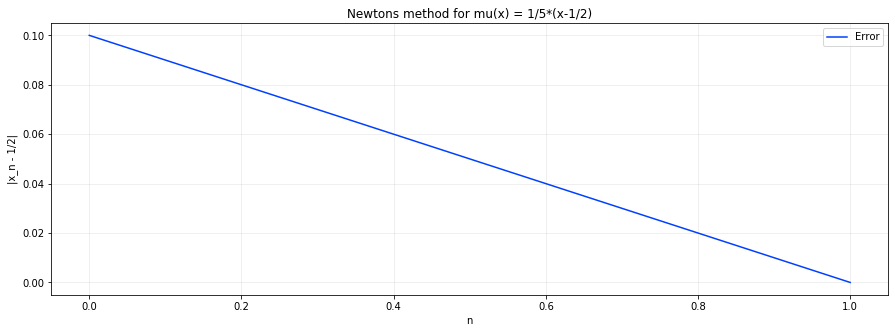

In [19]:
mu = lambda x : (1/5)*(x-1/2)
mu_prime = lambda x : 1/5
root, x_his, fx_his = newtons_method(mu, mu_prime, 0.4, tol=MACHINE_EPSILON)
x_his = np.array(x_his)
plt.plot(np.arange(len(x_his)), np.abs(x_his - (1/2)))
plt.xlabel('n')
plt.ylabel('|x_n - 1/2|')
plt.title('Newtons method for mu(x) = 1/5*(x-1/2)')
_= plt.legend(['Error'])

In [20]:
with np.printoptions(precision=20, suppress=True):
    print(np.abs(x_his - (1/2))[:20])

[0.09999999999999998 0.                 ]


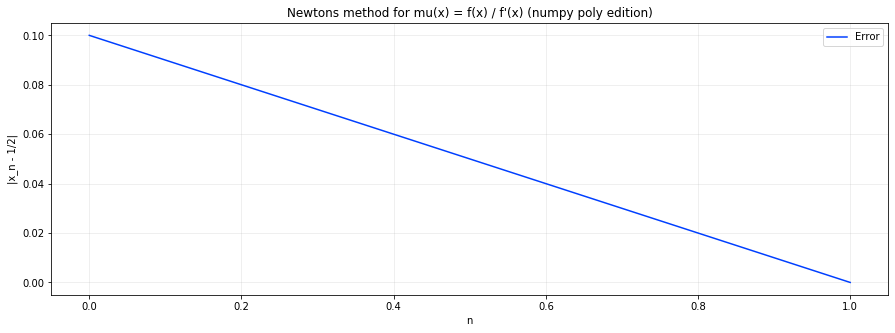

In [21]:
f_coeffs = np.poly(5*[1/2])
f_prime_coeffs = np.polyder(f_coeffs)
f_prime_prime_coeffs = np.polyder(f_prime_coeffs)
f = lambda x : np.polyval(f_coeffs, x)
f_prime = lambda x : np.polyval(f_prime_coeffs, x)
f_prime_prime = lambda x : np.polyval(f_prime_prime_coeffs, x)

mu = lambda x : f(x) / f_prime(x)
mu_prime = lambda x : (f_prime(x)**2 - f(x)*f_prime_prime(x)) / (f_prime(x))**2

root, x_his, fx_his = newtons_method(mu, mu_prime, 0.4, tol=MACHINE_EPSILON)
x_his = np.array(x_his)
plt.plot(np.arange(len(x_his)), np.abs(x_his - (1/2)))
plt.xlabel('n')
plt.ylabel('|x_n - 1/2|')
plt.title('Newtons method for mu(x) = f(x) / f\'(x) (numpy poly edition)')
_= plt.legend(['Error'])

In [22]:
with np.printoptions(precision=20, suppress=True):
    print(np.abs(x_his - (1/2))[:20])

[0.09999999999999998    0.00000000000009431345]


Here, the error converges in both implementations. This is probably due to the fact that $\frac{1}{3}$ is irrational, whereas $\frac{1}{2}$ is not. Therefore, the precision requried is finite, as 0.5 can be represented exactly in a computer

# Problem 4

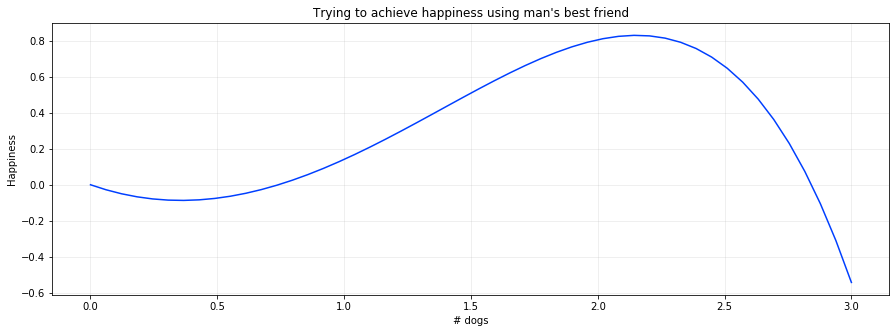

In [23]:
happiness = lambda dog : dog**2 - 0.5*(np.exp(dog) - 1)
xs = np.linspace(0, 3)
plt.plot(xs, happiness(xs))
plt.xlabel('# dogs')
plt.ylabel('Happiness')
_ = plt.title('Trying to achieve happiness using man\'s best friend')

A little sad, but understandable, that between owning 0.001 and 0.5ish of a dog, happiness is actually negative! What does negative happiness even look like? Could 2020 have reached this level?? 

To maximize this function, we can simply find the root of the derivative. If only we had a function to do this... oh wait! Recalling all the way back to the last problem, we have Newton's Method! So we need to find the first derivative and the second derivative, which is easy enough to do by hand

In [24]:
happiness_prime = lambda dog : 2*dog - 0.5*np.exp(dog)
happiness_double_prime = lambda dog : 2 - 0.5*np.exp(dog)
root, x_his, _ = newtons_method(happiness_prime, happiness_double_prime, 1.5, tol=MACHINE_EPSILON)

In [25]:
with np.printoptions(precision=20, suppress=True):
    print(np.array(x_his)[:20])

[1.5                4.6520560111449845 3.7969785313330715
 3.0727716700157313 2.5438108419924683 2.25132509208731
 2.1613273722136834 2.153352059475377  2.1532923674368205
 2.15329236411035   2.1532923641103494 2.15329236411035
 2.1532923641103494 2.15329236411035   2.1532923641103494
 2.15329236411035   2.1532923641103494 2.15329236411035
 2.1532923641103494 2.15329236411035  ]


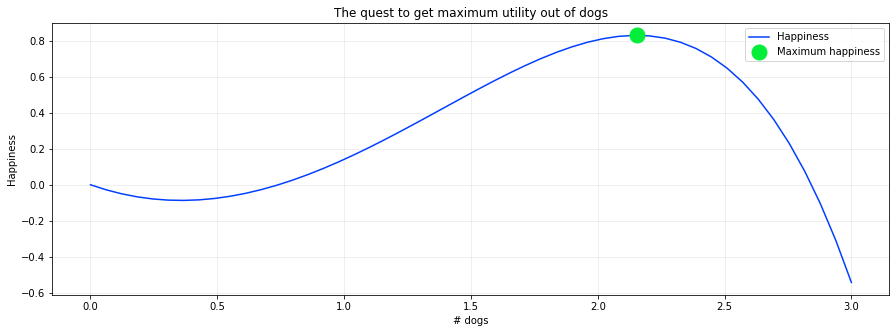

In [26]:
plt.plot(xs, happiness(xs))
plt.plot(root, happiness(root), 'o', markersize=15)
plt.xlabel('# dogs')
plt.ylabel('Happiness')
plt.title('The quest to get maximum utility out of dogs')
_ = plt.legend(['Happiness', 'Maximum happiness'])

In [27]:
print("Time to go buy %s dogs!"%root)

Time to go buy 2.1532923641103494 dogs!
